In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from typing import List

from collections import Counter

%matplotlib inline

D:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_excel('for_analitics.xlsx')
df.head()

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,{u'ТСТ Причина совершения операции': u'Продает...
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
3,6100,6100002,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:00:57,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
4,6100,6100005,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:03:45,2021-10-31 22:38:47,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."


In [3]:
df.shape

(8770, 10)

In [4]:
df.dtypes

case_id                           int64
trans_id                          int64
channel                          object
channel_op                       object
TB                                int64
platform                         object
product_type                     object
trx_begin_case           datetime64[ns]
crm_case_created_case    datetime64[ns]
questions                        object
dtype: object

In [5]:
df['questions'][0]

"{u'ТСТ Причина совершения операции': u'Продает или покупает товар/услугу черезИнтернет', u'ТСТ Вы совершили данную операцию самостоятельно?': u'1', u'Тип мошенничества': u'FIN', u'ТСТ Вердикт': u'Товар/услугу не получил, обман', u'ТСТ Схема мошенничества': u'Сам перевел'}"

# Missing values

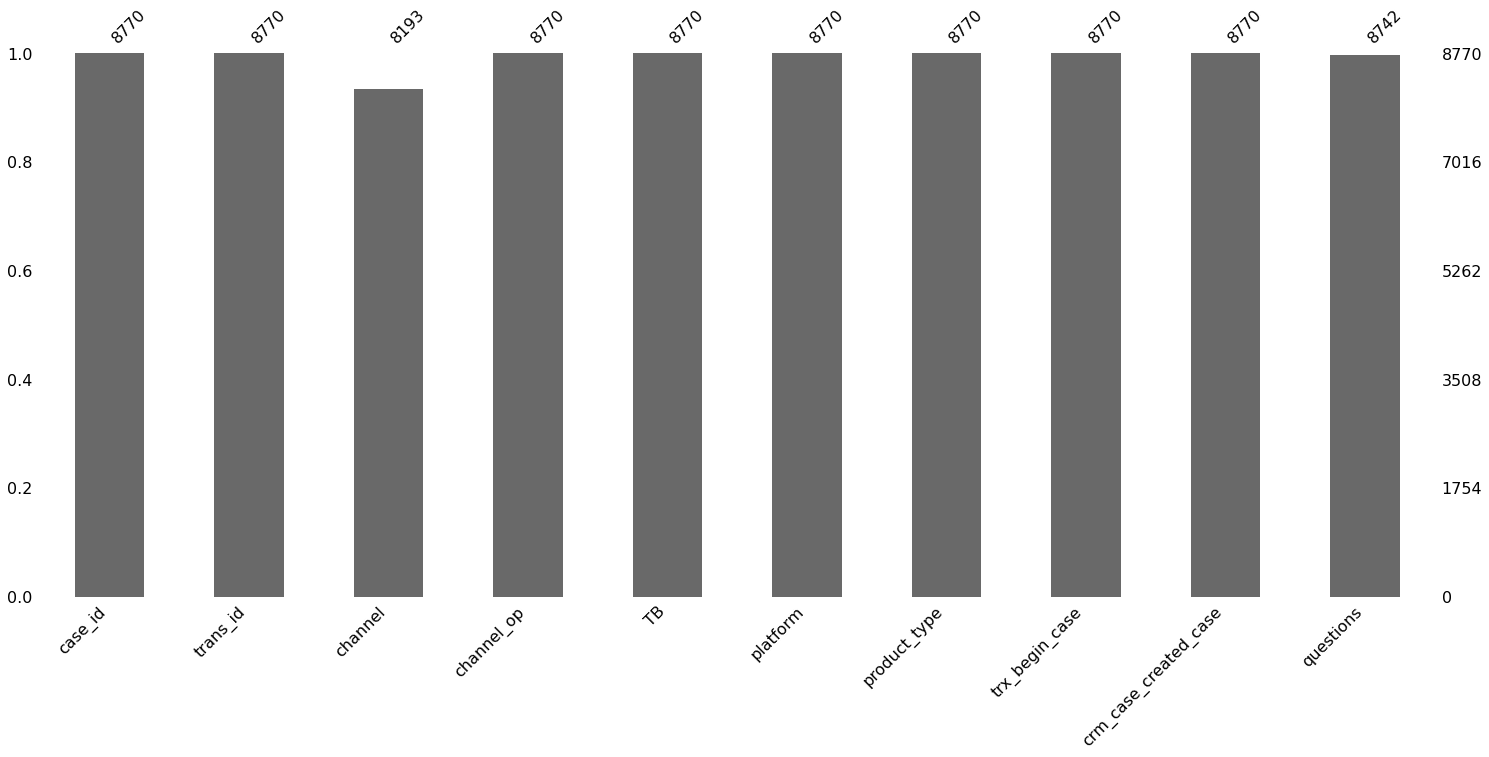

In [6]:
msno.bar(df)
plt.show()

In [7]:
df[df['channel'].isna()]['channel_op'].value_counts()

Устройства самообслуживания    573
ТСТ или Токен                    3
СБОЛ                             1
Name: channel_op, dtype: int64

In [8]:
df[df['channel_op'] == 'Устройства самообслуживания']['channel'].value_counts()

Иное                   37
Карта другого Банка     3
Номер телефона          1
Name: channel, dtype: int64

In [9]:
df[df['channel_op'] == 'ТСТ или Токен'].groupby('case_id').count()

,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
case_id,,,,,,,,,
2100,3,3,3,3,3,3,3,3,3
2200,2,2,2,2,2,2,2,2,2
2800,3,3,3,3,3,3,3,3,3
3300,1,1,1,1,1,1,1,1,1
3600,2,0,2,2,2,2,2,2,0
3900,2,2,2,2,2,2,2,2,2
7400,4,3,4,4,4,4,4,4,3
8800,3,3,3,3,3,3,3,3,3


In [10]:
df[df['questions'].isna()]['channel_op'].value_counts()

СБОЛ             18
Токен             5
ТСТ или Токен     3
Другое            2
Name: channel_op, dtype: int64

In [11]:
df[df['questions'].isna()]['channel'].value_counts()

Карта другого Банка    11
Снятие наличных         5
Карта Сбербанка         4
Номер телефона          2
Иное                    2
Name: channel, dtype: int64

In [12]:
df[df['questions'].isna()].groupby('case_id').count()

,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,questions
case_id,,,,,,,,,
500,2,2,2,2,2,2,2,2,0
2600,2,2,2,2,2,2,2,2,0
3100,1,1,1,1,1,1,1,1,0
3500,2,2,2,2,2,2,2,2,0
3600,2,0,2,2,2,2,2,2,0
4400,1,1,1,1,1,1,1,1,0
5000,1,1,1,1,1,1,1,1,0
5200,5,5,5,5,5,5,5,5,0
6400,1,0,1,1,1,1,1,1,0


##### В столбце channel отсутсвует 577 значений
Если канал куда совершенно было списание отсутсвует,то канал с которогое списали - это терминал самообслуживания(4 остальных вероятно выбросы).
Так как в большинстве случаев если списывали с терминала самообслуживания,то переводили в канал 'Иное',таким же значением и заполним пропуски.

##### В столбце questions отсутсвует 28 значений
Большинство из них - транзакции из СБОЛ на карту другого банка.
Заполним их текстом 'НетДанных'.

In [13]:
df['questions']=df['questions'].fillna('НетДанных')
df['channel'] = df['channel'].fillna('Иное')

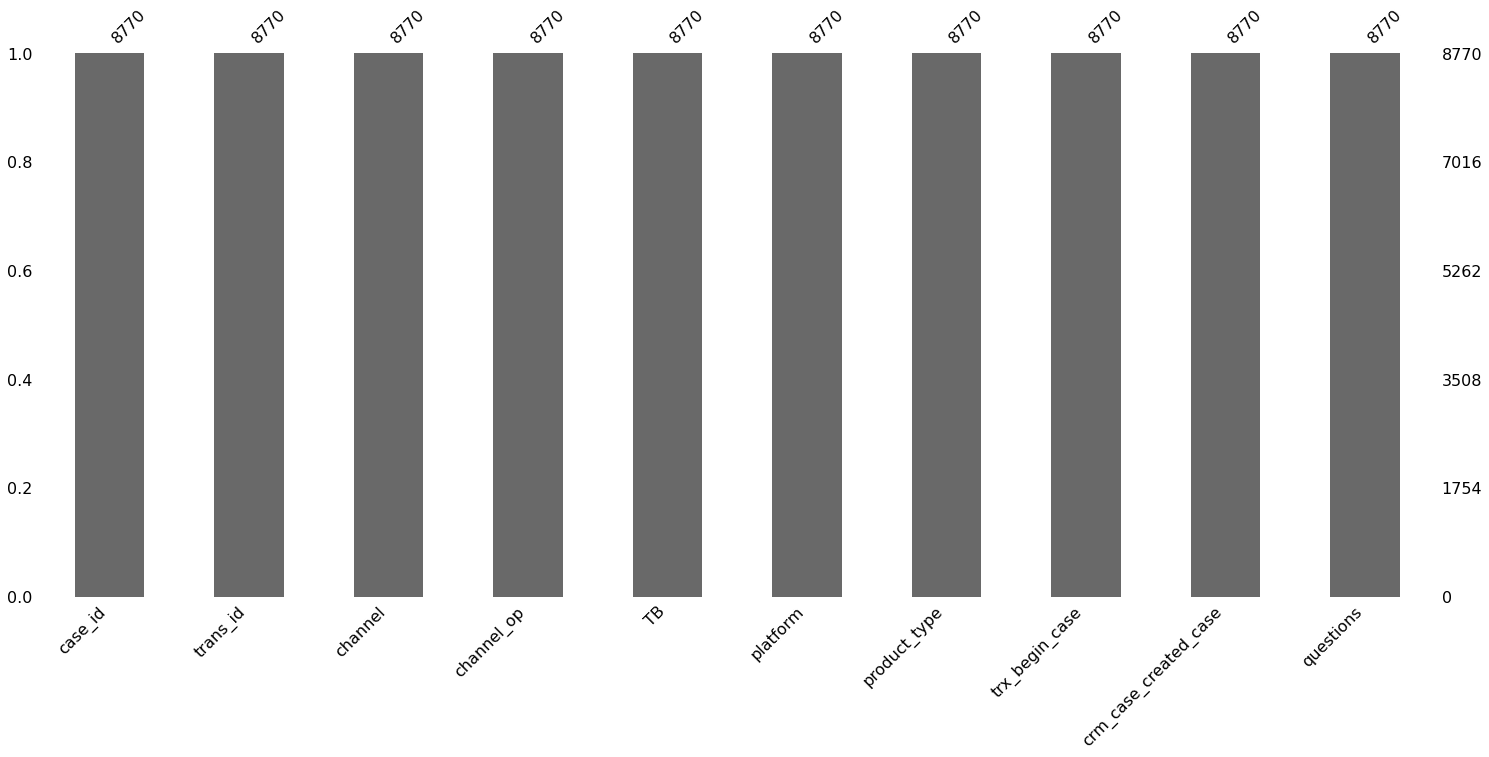

In [14]:
msno.bar(df)
plt.show()

# EDA

In [15]:
df['case_id'].value_counts()

6700    152
2500    149
5300    132
6900    126
7000    123
       ... 
7100     57
1300     54
8000     54
100      50
7900     43
Name: case_id, Length: 100, dtype: int64

In [16]:
df.groupby('case_id')['trans_id'].count().describe()

count    100.000000
mean      87.700000
std       18.756548
min       43.000000
25%       75.750000
50%       86.000000
75%       95.000000
max      152.000000
Name: trans_id, dtype: float64

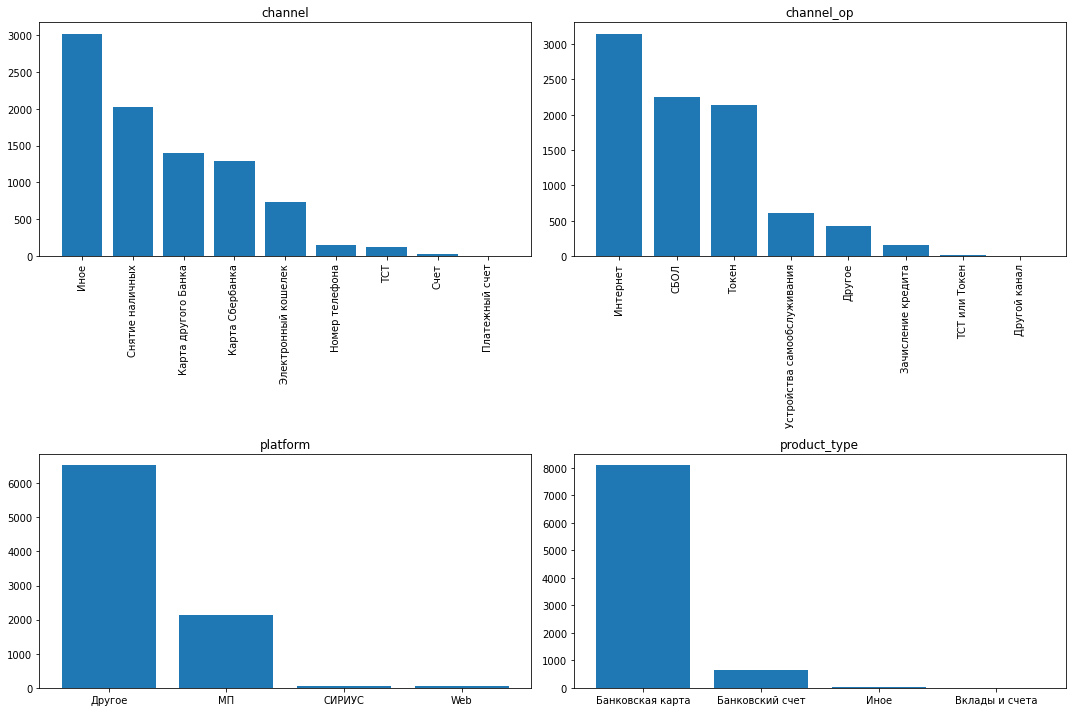

In [17]:
plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
plt.bar(df['channel'].value_counts().index,df['channel'].value_counts().values)
plt.xticks(rotation=90)
plt.title('channel')
plt.subplot(2, 2, 2)
plt.bar(df['channel_op'].value_counts().index,df['channel_op'].value_counts().values)
plt.xticks(rotation=90)
plt.title('channel_op')
plt.subplot(2, 2, 3)
plt.bar(df['platform'].value_counts().index,df['platform'].value_counts().values)
plt.title('platform')
plt.subplot(2, 2, 4)
plt.bar(df['product_type'].value_counts().index,df['product_type'].value_counts().values)
plt.title('product_type')
plt.tight_layout()
plt.show()

In [18]:
df.groupby('channel')['channel_op'].value_counts(normalize = False)

channel              channel_op                 
Иное                 Интернет                       1603
                     Устройства самообслуживания     610
                     Другое                          381
                     СБОЛ                            264
                     Зачисление кредита              142
                     ТСТ или Токен                    20
                     Другой канал                      1
Карта Сбербанка      СБОЛ                            696
                     Интернет                        557
                     Зачисление кредита               20
                     Другое                           16
Карта другого Банка  СБОЛ                           1080
                     Интернет                        301
                     Другое                           21
                     Устройства самообслуживания       3
Номер телефона       СБОЛ                            135
                     Другое            

In [19]:
df.groupby('channel')['channel_op'].value_counts(normalize = True)

channel              channel_op                 
Иное                 Интернет                       0.530619
                     Устройства самообслуживания    0.201920
                     Другое                         0.126117
                     СБОЛ                           0.087388
                     Зачисление кредита             0.047004
                     ТСТ или Токен                  0.006620
                     Другой канал                   0.000331
Карта Сбербанка      СБОЛ                           0.539953
                     Интернет                       0.432118
                     Зачисление кредита             0.015516
                     Другое                         0.012413
Карта другого Банка  СБОЛ                           0.768683
                     Интернет                       0.214235
                     Другое                         0.014947
                     Устройства самообслуживания    0.002135
Номер телефона       СБОЛ           

In [20]:
(df.groupby('case_id')['trx_begin_case'].max()-df.groupby('case_id')['trx_begin_case'].min()).describe()

count                          100
mean        5 days 12:37:48.030000
std      0 days 09:16:35.253051486
min                3 days 19:25:01
25%         5 days 10:25:57.750000
50%                5 days 14:42:17
75%         5 days 17:59:28.750000
max                5 days 23:44:56
Name: trx_begin_case, dtype: object

In [21]:
df.groupby('case_id')['trx_begin_case'].describe(datetime_is_numeric = True)

,count,mean,min,25%,50%,75%,max
case_id,,,,,,,
0,89,2021-11-02 12:34:42.089887744,2021-11-01 00:16:30,2021-11-01 11:33:14,2021-11-02 12:58:21,2021-11-02 22:38:40,2021-11-06 10:43:25
100,50,2021-11-03 03:49:13.460000,2021-11-01 05:41:07,2021-11-01 19:08:46,2021-11-03 02:54:39.500000,2021-11-04 01:45:16.249999872,2021-11-05 17:16:36
200,92,2021-11-03 10:44:03.934782976,2021-11-01 04:34:52,2021-11-02 07:47:21,2021-11-03 04:43:30.500000,2021-11-04 18:15:34.249999872,2021-11-06 13:52:12
300,98,2021-11-02 18:12:20.224489728,2021-11-01 02:03:54,2021-11-01 11:18:54.750000128,2021-11-02 14:19:57,2021-11-03 18:35:20.500000,2021-11-06 03:32:56
400,83,2021-11-03 02:18:40.361445632,2021-11-01 00:04:10,2021-11-01 18:59:53,2021-11-02 18:48:40,2021-11-04 09:40:25.500000,2021-11-06 17:29:37
...,...,...,...,...,...,...,...
9500,78,2021-11-03 10:29:44.410256640,2021-11-01 00:36:44,2021-11-02 14:38:14.249999872,2021-11-02 21:01:42,2021-11-04 13:13:04.500000,2021-11-06 07:47:28
9600,80,2021-11-03 12:14:15.987500032,2021-11-01 00:10:57,2021-11-02 12:26:04.750000128,2021-11-02 21:51:04.500000,2021-11-04 21:55:05.500000,2021-11-06 12:42:47
9700,98,2021-11-03 01:19:43.602040832,2021-11-01 04:35:19,2021-11-01 12:16:58.500000,2021-11-02 16:27:16,2021-11-04 04:11:54.500000,2021-11-06 14:28:51


In [22]:
df.groupby('case_id')['crm_case_created_case'].max()-df.groupby('case_id')['crm_case_created_case'].min()

case_id
0      7 days 09:14:15
100    7 days 00:32:29
200    7 days 00:23:10
300    7 days 06:40:06
400    6 days 15:32:54
             ...      
9500   5 days 10:37:33
9600   7 days 15:06:34
9700   7 days 07:11:59
9800   7 days 08:00:13
9900   7 days 13:40:26
Name: crm_case_created_case, Length: 100, dtype: timedelta64[ns]

In [23]:
df.groupby('case_id')['crm_case_created_case'].describe(datetime_is_numeric = True)

,count,mean,min,25%,50%,75%,max
case_id,,,,,,,
0,89,2021-11-02 23:01:21.853932544,2021-11-01 01:29:05,2021-11-01 15:23:49,2021-11-02 20:19:03,2021-11-03 16:36:45,2021-11-08 10:43:20
100,50,2021-11-03 09:55:47.939999744,2021-11-01 08:44:25,2021-11-01 22:05:53.750000128,2021-11-03 06:43:27.500000,2021-11-04 11:00:24,2021-11-08 09:16:54
200,92,2021-11-03 19:04:39.923913216,2021-11-01 09:14:16,2021-11-02 16:46:47.500000,2021-11-03 13:51:33,2021-11-05 01:07:40.500000,2021-11-08 09:37:26
300,98,2021-11-03 00:17:23.387755008,2021-11-01 02:09:49,2021-11-01 13:53:02.249999872,2021-11-02 18:42:01,2021-11-03 21:46:59.750000128,2021-11-08 08:49:55
400,83,2021-11-03 14:07:11.289156352,2021-11-01 01:06:10,2021-11-02 17:32:26,2021-11-03 06:16:47,2021-11-04 16:43:33.500000,2021-11-07 16:39:04
...,...,...,...,...,...,...,...
9500,78,2021-11-03 15:27:14.564102912,2021-11-01 01:01:01,2021-11-02 18:55:24,2021-11-03 13:35:21,2021-11-04 20:29:02,2021-11-06 11:38:34
9600,80,2021-11-03 21:40:44.100000,2021-11-01 01:13:06,2021-11-02 17:37:55,2021-11-03 01:00:54.500000,2021-11-05 05:35:41.500000,2021-11-08 16:19:40
9700,98,2021-11-03 08:07:38.418367232,2021-11-01 08:50:47,2021-11-01 14:15:38,2021-11-02 19:34:21,2021-11-04 21:43:28,2021-11-08 16:02:46


In [24]:
time_to_react = abs(df['crm_case_created_case']-df['trx_begin_case']) #сколько времени прошло с транзакции до обращения
df.insert(9, 'time_to_react', time_to_react)
df.head()

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,time_to_react,questions
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,0 days 08:54:54,{u'ТСТ Причина совершения операции': u'Продает...
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,0 days 03:21:06,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,0 days 03:26:21,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
3,6100,6100002,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:00:57,2021-10-31 22:38:47,0 days 03:22:10,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."
4,6100,6100005,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:03:45,2021-10-31 22:38:47,0 days 03:24:58,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':..."


In [25]:
df.groupby('case_id')['time_to_react'].describe()

,count,mean,std,min,25%,50%,75%,max
case_id,,,,,,,,
0,89,0 days 10:32:24.303370786,0 days 15:32:14.309169410,0 days 00:05:49,0 days 01:43:24,0 days 04:15:32,0 days 13:47:37,3 days 22:07:47
100,50,0 days 06:06:34.480000,0 days 11:20:38.175673459,0 days 00:06:00,0 days 01:20:50,0 days 03:02:50,0 days 06:04:41.250000,2 days 19:22:51
200,92,0 days 08:20:37.054347826,0 days 21:53:02.729095280,0 days 00:00:04,0 days 00:23:09,0 days 02:10:29,0 days 07:37:49.250000,6 days 21:58:08
300,98,0 days 06:05:03.163265306,0 days 09:42:37.349858768,0 days 00:03:38,0 days 00:25:47.250000,0 days 02:44:19,0 days 05:06:40,2 days 09:41:53
400,83,0 days 11:48:32.951807228,0 days 21:32:52.027886267,0 days 00:01:24,0 days 00:45:35,0 days 03:48:08,0 days 16:05:52.500000,6 days 01:27:14
...,...,...,...,...,...,...,...,...
9500,78,0 days 05:02:35.128205128,0 days 06:46:46.977647906,0 days 00:01:53,0 days 00:40:20.750000,0 days 03:18:35,0 days 05:04:40.250000,1 days 04:58:22
9600,80,0 days 09:29:09.762500,0 days 16:01:12.239079005,0 days 00:01:46,0 days 00:26:01.500000,0 days 01:37:29,0 days 07:55:32,3 days 08:08:20
9700,98,0 days 06:57:01.959183673,0 days 12:43:42.960192714,0 days 00:01:14,0 days 00:39:14.250000,0 days 03:14:07,0 days 05:32:10.500000,4 days 00:56:12


In [26]:
df.groupby('case_id')['time_to_react'].mean().describe()

count                          100
mean     0 days 07:50:56.553792244
std      0 days 03:18:22.447537400
min      0 days 03:18:32.788888888
25%      0 days 05:41:55.559121621
50%      0 days 07:04:46.204411764
75%      0 days 09:15:00.417682926
max      1 days 01:44:00.214876033
Name: time_to_react, dtype: object

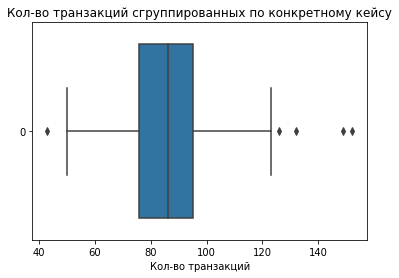

In [27]:
sns.boxplot(data = df.groupby('case_id')['trans_id'].count(),orient = 'h')
plt.title('Кол-во транзакций сгруппированных по конкретному кейсу')
plt.xlabel('Кол-во транзакций')
plt.show()

In [28]:
outliers = df.groupby('case_id')['trans_id'].count()
q75, q25 = np.percentile(outliers, [75 ,25])
iqr = q75 - q25
outliers.where((outliers <= q25 - 1.5*iqr ) | (outliers >= q75 + 1.5*iqr )).fillna(0).values.nonzero()[0]*100

array([2500, 5300, 6700, 6900, 7900], dtype=int64)

In [29]:
df[df['product_type'] == 'Вклады и счета']

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,time_to_react,questions
4634,8800,8800002,Счет,СБОЛ,5,МП,Вклады и счета,2021-11-02,2021-11-03 00:34:28,1 days 00:34:28,"{u'СБОЛ. Схема мошенничества': u'Сам перевел',..."
5182,1600,1600001,Счет,СБОЛ,5,МП,Вклады и счета,2021-11-03,2021-11-03 15:03:50,0 days 15:03:50,"{u'СБОЛ. Схема мошенничества': u'Сам перевел',..."
6529,1300,1300001,Карта другого Банка,СБОЛ,6,МП,Вклады и счета,2021-11-04,2021-11-04 15:28:39,0 days 15:28:39,"{u'СБОЛ. Схема мошенничества': u'Сам перевел',..."
6530,1300,1300003,Карта другого Банка,СБОЛ,6,МП,Вклады и счета,2021-11-04,2021-11-04 15:28:39,0 days 15:28:39,"{u'СБОЛ. Схема мошенничества': u'Сам перевел',..."


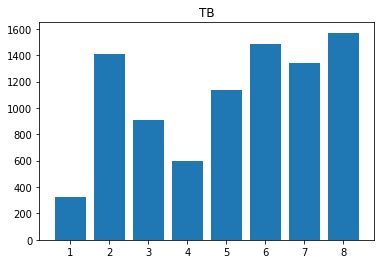

In [30]:
plt.bar(df['TB'].value_counts().index,df['TB'].value_counts().values)
plt.title('TB')
plt.show()

In [31]:
df.groupby('TB')['case_id'].count()

TB
1     324
2    1412
3     912
4     594
5    1133
6    1485
7    1340
8    1570
Name: case_id, dtype: int64

In [32]:
df.groupby('TB')['channel'].value_counts()

TB  channel            
1   Снятие наличных         258
    Иное                     58
    Карта другого Банка       6
    Номер телефона            2
2   Снятие наличных         902
    Иное                    482
    Карта другого Банка      13
    Номер телефона            8
    Карта Сбербанка           7
3   Снятие наличных         595
    Иное                    309
    Карта Сбербанка           6
    Карта другого Банка       1
    Номер телефона            1
4   Снятие наличных         271
    Иное                    214
    ТСТ                      85
    Карта Сбербанка          20
    Карта другого Банка       4
5   Карта другого Банка     508
    Карта Сбербанка         274
    Иное                    222
    Номер телефона           64
    ТСТ                      34
    Электронный кошелек      19
    Счет                     12
6   Карта другого Банка     812
    Карта Сбербанка         425
    Иное                    133
    Номер телефона           71
    Электронный 

In [33]:
df.groupby('TB')['channel_op'].value_counts()

TB  channel_op                 
1   Токен                           258
    Другое                           35
    Устройства самообслуживания      26
    Зачисление кредита                5
2   Токен                           902
    Устройства самообслуживания     258
    Другое                          165
    Зачисление кредита               78
    ТСТ или Токен                     9
3   Токен                           595
    Устройства самообслуживания     163
    Другое                          123
    Зачисление кредита               26
    ТСТ или Токен                     5
4   Токен                           356
    Устройства самообслуживания     104
    Другое                           88
    Зачисление кредита               42
    ТСТ или Токен                     3
    Другой канал                      1
5   СБОЛ                           1005
    Устройства самообслуживания      63
    Токен                            34
    Другое                           17
    Зачи

In [34]:
df.groupby('TB')['channel_op'].value_counts(normalize = True)

TB  channel_op                 
1   Токен                          0.796296
    Другое                         0.108025
    Устройства самообслуживания    0.080247
    Зачисление кредита             0.015432
2   Токен                          0.638810
    Устройства самообслуживания    0.182720
    Другое                         0.116856
    Зачисление кредита             0.055241
    ТСТ или Токен                  0.006374
3   Токен                          0.652412
    Устройства самообслуживания    0.178728
    Другое                         0.134868
    Зачисление кредита             0.028509
    ТСТ или Токен                  0.005482
4   Токен                          0.599327
    Устройства самообслуживания    0.175084
    Другое                         0.148148
    Зачисление кредита             0.070707
    ТСТ или Токен                  0.005051
    Другой канал                   0.001684
5   СБОЛ                           0.887026
    Устройства самообслуживания    0.055605


In [35]:
df['platform'].value_counts()

Другое    6532
МП        2141
СИРИУС      54
Web         43
Name: platform, dtype: int64

In [36]:
df.groupby('platform')['channel_op'].value_counts()

platform  channel_op                 
Web       СБОЛ                             43
Другое    Интернет                       3150
          Токен                          2145
          Устройства самообслуживания     614
          Другое                          428
          Зачисление кредита              162
          ТСТ или Токен                    20
          СБОЛ                             12
          Другой канал                      1
МП        СБОЛ                           2141
СИРИУС    СБОЛ                             54
Name: channel_op, dtype: int64

In [37]:
df.groupby('platform')['channel'].value_counts(normalize = False)

platform  channel            
Web       Электронный кошелек      18
          Карта другого Банка      10
          Иное                      8
          Карта Сбербанка           5
          Счет                      2
Другое    Иное                   2757
          Снятие наличных        2026
          Электронный кошелек     689
          Карта Сбербанка         601
          Карта другого Банка     329
          ТСТ                     119
          Номер телефона           11
МП        Карта другого Банка    1058
          Карта Сбербанка         676
          Иное                    220
          Номер телефона          132
          Электронный кошелек      31
          Счет                     23
          Платежный счет            1
СИРИУС    Иное                     36
          Карта другого Банка       8
          Карта Сбербанка           7
          Номер телефона            3
Name: channel, dtype: int64

In [38]:
df.groupby('platform')['channel'].value_counts(normalize = True)

platform  channel            
Web       Электронный кошелек    0.418605
          Карта другого Банка    0.232558
          Иное                   0.186047
          Карта Сбербанка        0.116279
          Счет                   0.046512
Другое    Иное                   0.422076
          Снятие наличных        0.310165
          Электронный кошелек    0.105481
          Карта Сбербанка        0.092009
          Карта другого Банка    0.050367
          ТСТ                    0.018218
          Номер телефона         0.001684
МП        Карта другого Банка    0.494162
          Карта Сбербанка        0.315740
          Иное                   0.102756
          Номер телефона         0.061653
          Электронный кошелек    0.014479
          Счет                   0.010743
          Платежный счет         0.000467
СИРИУС    Иное                   0.666667
          Карта другого Банка    0.148148
          Карта Сбербанка        0.129630
          Номер телефона         0.055556
Name

In [39]:
df['questions'] = df['questions'].astype('str')

In [40]:
def split_text(text: str) -> List[List[str]]:
    '''
    Преобразует строку в двумерный массив,в котором 0 ось содержит вопросы,а 1 ось содержит ответы на данные вопросы.
    '''
    array = []
    text_split = text.split('u')[1:]
    for i in range(0,len(text_split),2):
        array.append(text_split[i:i+2])
    return array

In [41]:
df['question_parsed'] = df['questions'].apply(lambda x: [i[0][1:-3] for i in split_text(x)])
df['answer_parsed'] = df['questions'].apply(lambda x: [i[1][1:-3] for i in split_text(x)])

In [42]:
df.head(3)

,case_id,trans_id,channel,channel_op,TB,platform,product_type,trx_begin_case,crm_case_created_case,time_to_react,questions,question_parsed,answer_parsed
0,8200,8200001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 06:57:19,2021-10-31 22:02:25,0 days 08:54:54,{u'ТСТ Причина совершения операции': u'Продает...,"[ТСТ Причина совершения операции, ТСТ Вы совер...",[Продает или покупает товар/услугу черезИнтерн...
1,6100,6100001,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 01:59:53,2021-10-31 22:38:47,0 days 03:21:06,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[Тип мошенничества, ТСТ Вердикт, ТСТ Операция ...","[FIN, Воспользовались 3 лица без спроса, 0, 0,..."
2,6100,6100007,Электронный кошелек,Интернет,7,Другое,Банковская карта,2021-11-01 02:05:08,2021-10-31 22:38:47,0 days 03:26:21,"{u'Тип мошенничества': u'FIN', u'ТСТ Вердикт':...","[Тип мошенничества, ТСТ Вердикт, ТСТ Операция ...","[FIN, Воспользовались 3 лица без спроса, 0, 0,..."


In [43]:
cnt,cnt_unk,cnt_3,cnt_fishing = 0,0,0,0
for i in df['answer_parsed']:
    if 'Обстоятельства выяснить не удалос' in i:
        cnt_unk +=1
    elif 'Воспользовались 3 лица без спроса' in i:
        cnt_3 +=1
    elif 'Сам перевел' in i:
        cnt_fishing +=1
    else:
        cnt +=1
cnt,cnt_unk,cnt_3,cnt_fishing,df['answer_parsed'].shape[0]

(1978, 4, 5074, 1714, 8770)

In [44]:
cnt,cnt_unk,cnt_3,cnt_fishing = 0,0,0,0
for i in df[df['product_type'] == 'Иное']['answer_parsed']:
    if 'Обстоятельства выяснить не удалос' in i:
        cnt_unk +=1
    elif 'Воспользовались 3 лица без спроса' in i:
        cnt_3 +=1
    elif 'Сам перевел' in i:
        cnt_fishing +=1
    else:
        cnt +=1
cnt,cnt_unk,cnt_3,cnt_fishing,df[df['product_type'] == 'Иное']['answer_parsed'].shape[0]

(6, 4, 8, 19, 37)

In [45]:
cnt,cnt_unk,cnt_3,cnt_fishing = 0,0,0,0
for i in df[df['product_type'] == 'Вклады и счета']['answer_parsed']:
    if 'выяснить не удалос' in i:
        cnt_unk +=1
    elif '3 лица' in i:
        cnt_3 +=1
    elif 'Сам перевел' in i:
        cnt_fishing +=1
    else:
        cnt +=1
cnt,cnt_unk,cnt_3,cnt_fishing,df[df['product_type'] == 'Иное']['answer_parsed'].shape[0]

(0, 0, 0, 4, 37)

In [46]:
unique_questions = set() # множество уникальных вопросов
for i in df['question_parsed']:
    for j in i:
        unique_questions.add(j)

In [47]:
keys = []
unk = []
for i in unique_questions:
    i = i.split(' ')
    if i[0] == 'Тип' or i[0] == 'номер' or i[0] == 'Как':
        unk.append(keys[-1]) #если в вопросе нет тега,отнесем к прошлому каналу в котором был тег
        keys.append(keys[-1])
    elif i[0] == '':
        keys.append('Другое')
    elif i[0][-1] == '.':
        keys.append(i[0][:-1])
    else:
        keys.append(i[0])
keys = list(set(keys))

In [48]:
channel_question = dict.fromkeys(keys,[]) # key - канал откуда совершили списание, value - вопрос
for i in unique_questions:
    i = i.split(' ')
    w = ' '.join(i[1:])
    cnt = 0
    if i[0] == 'Тип' or i[0] == 'номер' or i[0] == 'Как':
        if w not in channel_question[unk[cnt]]:
            channel_question[unk[cnt]] += [w]
            cnt +=1
    elif i[0] == '':
        if w not in channel_question['Другое']:
            channel_question['Другое'] += [w]
    elif i[0][-1] == '.':
        if w not in channel_question[i[0][:-1]]:
            channel_question[i[0][:-1]] += [w]
    else:
        if w not in channel_question[i[0]]:
            channel_question[i[0]] += [w]

In [49]:
channel_question['СБОЛ']

['Вы совершили данную операцию самостоятельно?',
 'Схема мошенничества',
 'Операция проводилась в банкомате Сбербанка?',
 'Вердикт',
 'На вашем телефоне наблюдалась неработоспособность сим-карты?',
 'Вы устанавливали перед операцией новые мобильные приложения?',
 'Операция была с 3DS?',
 'Вы сообщали кому-то номер карты или смс-пароли с номера 900?',
 'На момент операции карта и телефон были у Вас?',
 'Вы сообщали\xa0персональную информацию?',
 'или Токен Схема мошенничества',
 'мошенники обратились к вам?',
 'Вы сами подтверждали операцию?',
 'Причина совершения операции',
 'Вы получали СМС с паролями?',
 'Вы подключили этот номер к своей карте по чьей-то просьбе?',
 'Установка программ была сделана по просьбе 3 лиц?',
 'Куда-то вводили номер карты или смс-пароли с номера 900?',
 'телефона, с которого был звонок?',
 'Вы теряли или передавали кому-то Ваши карты, телефон?',
 'Этот номер принадлежал Вам раньше?',
 'Как с Вами связались мошенники?',
 'мошенничества',
 'тип СБОЛ (На основе

In [50]:
unique_answers = set() # множество уникальных ответов
for i in df['answer_parsed']:
    for j in i:
        unique_answers.add(j)

In [51]:
answer_freq = dict.fromkeys(unique_answers,0) # сколько раз ответ был упомянут в датафрейме
for i in df['answer_parsed']:
    for j in i:
        answer_freq[j] +=1
Counter(answer_freq).most_common(len(answer_freq))

[('0', 11923),
 ('FIN', 8663),
 ('Воспользовались 3 лица без спроса', 5591),
 ('1', 3786),
 ('Воспользовались 3 лица без спрос', 2714),
 ('МП', 2240),
 ('', 2229),
 ('Карта и мобильный телефон (в том числе сим-карта) не на рука', 1948),
 ('Сам перевел', 1723),
 ('Продает или покупает товар/услугу черезИнтернет', 1543),
 ('Товар/услугу не получил, обман', 1520),
 ('Сам переве', 1010),
 ('Фишинг', 964),
 ('Перевод/платеж по просьбе 3 лиц', 825),
 ('Кто-то попросил совершить\xa0 данный перевод/платеж', 821),
 ('Звонок/СМС', 441),
 ('Карта и мобильный телефон (в том числе сим-карта) не на руках', 339),
 ('Предоставил данные для входа СБОЛ/Проведения операции', 335),
 ('Перевел деньги с целью получения дохода', 262),
 ('Перевод с целью получения дохода', 238),
 ('Кража личност', 197),
 ('Сам передал 3 лица', 159),
 ('Сам передал 3 лицам', 140),
 ('Кража личности', 136),
 ('Под руководством 3-х лиц', 116),
 ('Перевод/платеж по просьбе 3 ли', 102),
 ('Перевод/платеж по просьбе третьих лиц', 1

In [52]:
len(set(channel_question['ВСП']) & set(channel_question['УС']) & set(channel_question['МБК']) & 
    set(channel_question['Кредит']) & set(channel_question['ТСТ']) & set(channel_question['Другое']) & 
    set(channel_question['СБОЛ']))

29

In [53]:
len(set(channel_question['ВСП']) | set(channel_question['УС']) | set(channel_question['МБК']) | 
    set(channel_question['Кредит']) | set(channel_question['ТСТ']) | set(channel_question['Другое']) | 
    set(channel_question['СБОЛ']))

29

## Всего у нас 100 кейсов,в каждом из которых в среднем было 87-88 транзакций.

###### Среди 100 кейсов существуют выбросы по количеству транзакций:
* Кейс №7900 имеет всего 43 транзакции.
* Кейсы №2500,№5300,№6700,№6900 имеют больше 125 транзакций.

###### Время между первым и последним списанием:
* минимальное: 3 дня 19 часов.
* среднее: 5 дней 12 часов.
* максимальное: 6 дней.

###### Время реакции клиента:
* минимальное: 3 часа.
* среднее: 8 часов.
* максимальное: 1 день.

###### Самые популярные пары каналов списания - канал куда списали:
* Иное - Интернет 53% (1603 случаев) ; Устройство самообслуживания 20% (610 случаев).
* Карта Сбербанка - СБОЛ 53% (696 случаев) ; Интернет 43% (557 случаев).
* Карта другого банка - СБОЛ 76% (1080 случаев).
* Номер телефона - СБОЛ 92% (135 случаев).
* Платежный счет - СБОЛ 100% (1 случай).
* Снятие наличных - Токен 100% (2026 случаев).
* Счет - СБОЛ 100% (25 случаев).
* ТСТ - Токен 100% (119 случаев).
* Электронный кошелек - Интернет 93% (689 случаев).

###### В зависимости от тер.банка в большинстве случаев можно определить канал списания,и канал куда оно было произведено:
* TB = 1-4 - списание через токен на выдачу наличных 65.1 % (2111 случаев).
* TB = 5-6 - списание через СБОЛ на карту другого банка 85.9 % (2250 случаев).
* TB = 7-8 - списание через Интернет на карту другого банка или Иное 100 % (2880 случаев).

######  Связь платформы удаленного канала и канала,с которого было проведено списание:
* WEB - Электронный кошелек 41% (18 случаев) ; Карта другого Банка 23% (10 случаев).
* Другое - Иное 42% (2757 случаев) ; Снятие наличных 31% (2026 случаев).
* МП - Карта другого Банка 49% (1058 случаев) ; Карта Сбербанка 31% (676 случаев).
* Сириус - Иное 66% (39 случаев).

## Чаще всего операции проводятся с использованием СБОЛа (как в качестве канала куда списывают,так и в качестве канала откуда списывают).

###### Все транзакции можем разделить на такие категории ( исходя из ответов клиентов) :
* Воспользовались 3 лица без спроса - 10410 упоминаний.
* Сам перевел - 3520 упоминаний.
* Покупка/продажа товара через интернет - 3073 упоминаний.
* Утерянная карта/мобильный телефон/сим-карта - 2510 упоминаний.
* Фишинг - 965 упоминаний.
* Операции с целью получения прибыли - 535 упоминаний.
* Кража личности - 333 упоминания.
* Вредоносные приложения - 30 упоминаний.
* Не удалось выяснить обстоятельства - 126 упоминаний.

######  Связь типа продукта и вида транзакции:
Если тип продукта - 'Иное'  (19/37 случаев) или 'Вклады и счета' (4/4 случаев),то зачастую клиенты или проводят транзакции сами (фишинг) ,и лишь в остальных случаях в этом виноваты 3 лица (8/37 для 'Иное') или обстоятельства,которые не возможно выяснить (4/37 для 'Иное').

###### В зависимости от канала списания вопросы не меняются.

## Самые частые способы способы обмана - обман с использованием 3 лиц и фишинг.